In [2]:
import numpy as np
import h5py
from datetime import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# qubits = ["Z1", "Z2"]
# os.makedirs("covariance_matrix_data", exist_ok=True)

# for i in range(5):
#     if i == 0:
#         timestamp = datetime.now().strftime("%Y%m%d-%H%M%S-%f")
#         qubit_label = " ".join(qubits)
#         file_path = f"covariance_matrix_data/{timestamp}-CMAES cov {qubit_label}.h5"
    
#     matrix = np.random.rand(5, 5, 5)
#     with h5py.File(file_path, 'a') as f:
#         f.create_dataset(f'Cov_{i}', data=matrix)

In [15]:
def get_latest_cov(contains):
    folder = "covariance_matrix_data"

    if not os.path.exists(folder):
        return "No matching .h5 files found."

    # Handle string or list input
    if isinstance(contains, str):
        contains = contains.split("_")  # assumes underscore-separated string
    elif not isinstance(contains, list):
        raise ValueError("contains must be a string or a list of substrings")

    # List and filter files
    files = [f for f in os.listdir(folder) if f.endswith(".h5")]
    filtered_files = [f for f in files if all(substr in f for substr in contains)]
    filtered_files.sort()

    # Return data or message
    if filtered_files:
        latest_file = os.path.join(folder, filtered_files[-1])
        with h5py.File(latest_file, 'r') as f:
            data = {name: f[name][()] for name in f.keys()}  # read all datasets
        return data
    else:
        return "No matching .h5 files found."
        
def get_all_cov(contains):
    folder = "covariance_matrix_data"

    if not os.path.exists(folder):
        return "Folder does not exist."

    # Normalize input
    if isinstance(contains, str):
        contains = contains.split("_")  # treat as underscore-separated if string
    elif not isinstance(contains, list):
        raise ValueError("contains must be a string or a list of substrings")

    # Supported file extensions
    valid_exts = (".h5", ".hdf5")

    # Filter matching files
    files = [f for f in os.listdir(folder) if f.endswith(valid_exts)]
    filtered_files = [f for f in files if all(substr in f for substr in contains)]
    filtered_files.sort()

    if not filtered_files:
        return "No matching .h5 or .hdf5 files found."

    # Load and return all matching files
    all_data = {}
    for file in filtered_files:
        path = os.path.join(folder, file)
        with h5py.File(path, 'r') as f:
            file_data = {name: f[name][()] for name in f.keys()}
        all_data[file] = file_data

    return all_data



In [5]:
dataset = get_latest_cov(contains="CMAES") #,folder=r"\pschaefers\quantify-data")
print(dataset)

{'Cov_0': array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]]), 'Cov_1': array([[ 1.01947443,  0.02572797,  0.04659178,  0.00473831,  0.03119564,
         0.0470912 ,  0.03360557,  0.04382319,  0.00224596],
       [ 0.02572797,  0.90607463,  0.01596108,  0.03894533,  0.03519235,
         0.03534419,  0.01103413, -0.02100434, -0.02622358],
       [ 0.04659178,  0.01596108,  1.01226138,  0.04731876,  0.01944953,
         0.02777353, -0.00889408, -0.00721392, -0.00318768],
       [ 0.00473831,  0.03894533,  0.04731876,  1.04312574,  0.06540839,
         0.04891539,  0.01940774,  0.04683723, -0.00558766],
       [ 0.03119564,  0.03519235,  0.0

In [6]:
for key in dataset.keys():
    print(key)

Cov_0
Cov_1
Cov_10
Cov_11
Cov_12
Cov_13
Cov_14
Cov_15
Cov_16
Cov_17
Cov_18
Cov_19
Cov_2
Cov_20
Cov_21
Cov_22
Cov_23
Cov_24
Cov_25
Cov_26
Cov_27
Cov_28
Cov_29
Cov_3
Cov_30
Cov_31
Cov_32
Cov_33
Cov_34
Cov_35
Cov_36
Cov_37
Cov_38
Cov_39
Cov_4
Cov_40
Cov_41
Cov_42
Cov_43
Cov_44
Cov_45
Cov_46
Cov_47
Cov_48
Cov_49
Cov_5
Cov_50
Cov_6
Cov_7
Cov_8
Cov_9


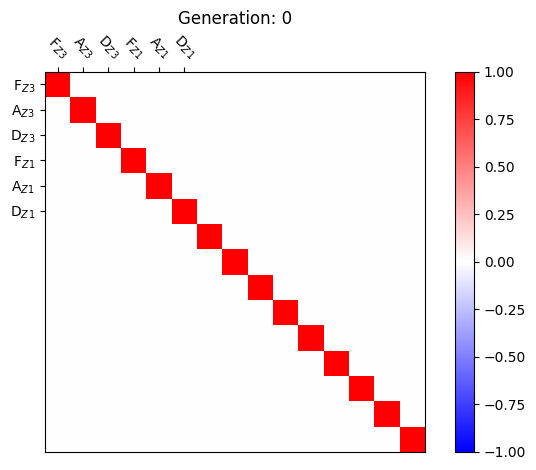

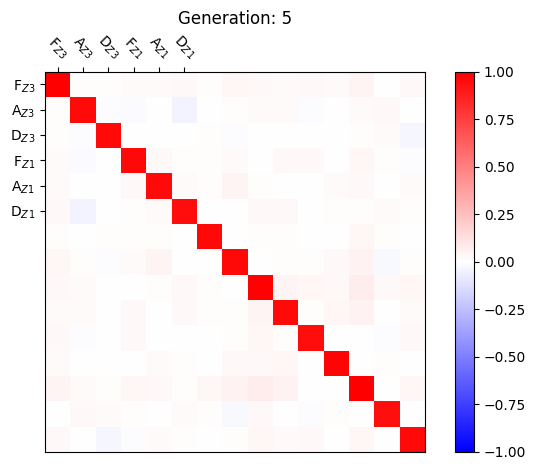

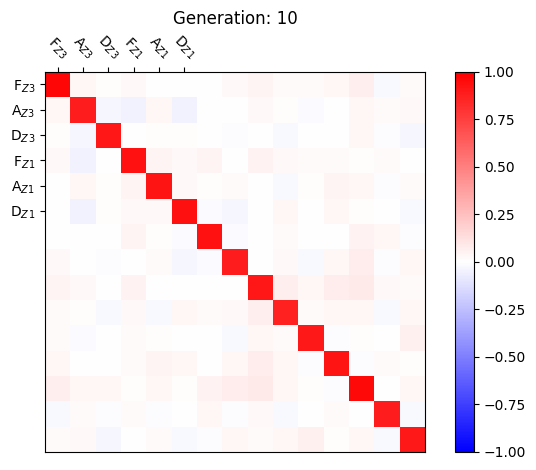

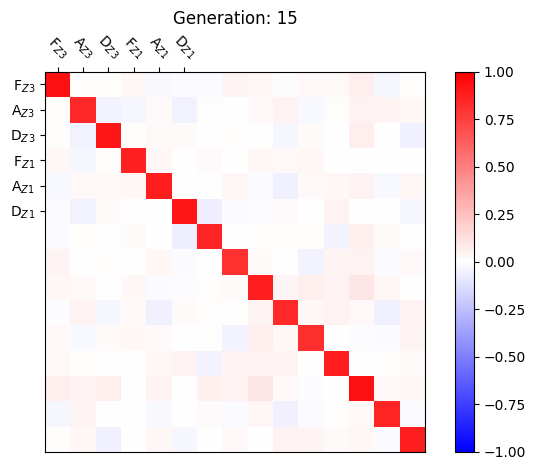

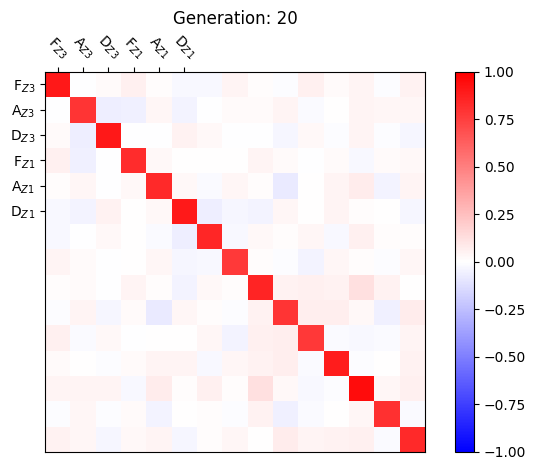

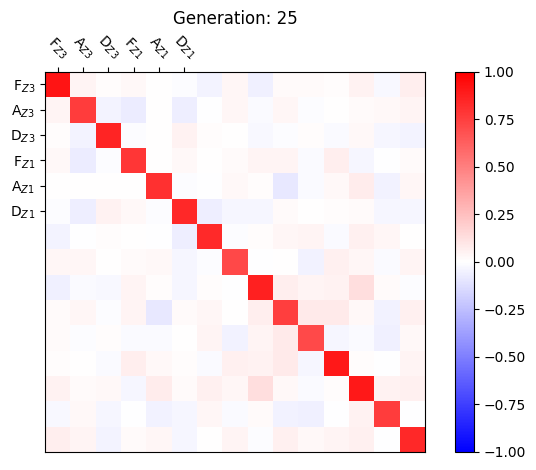

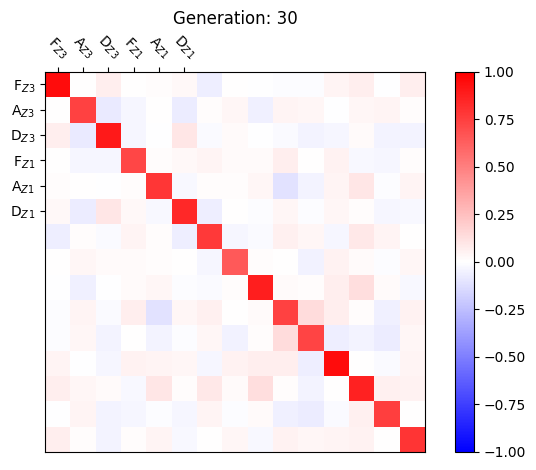

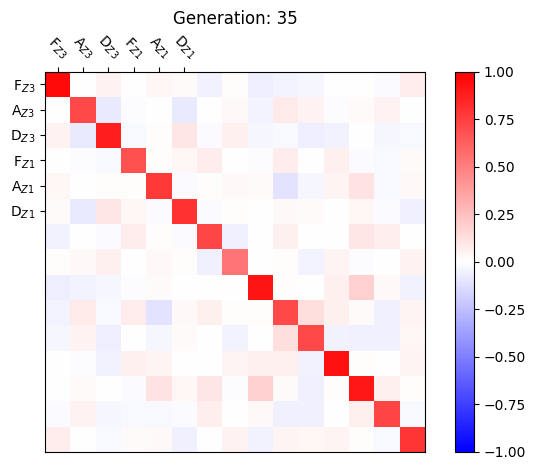

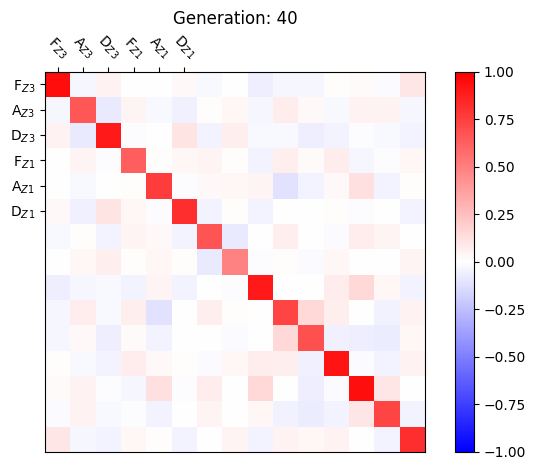

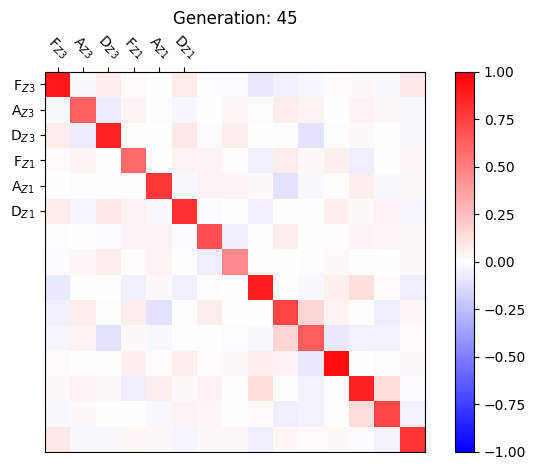

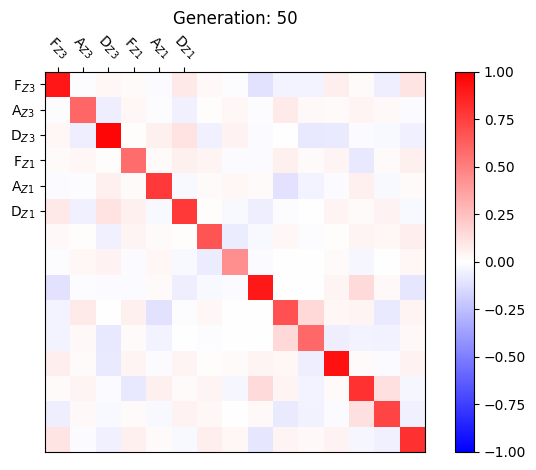

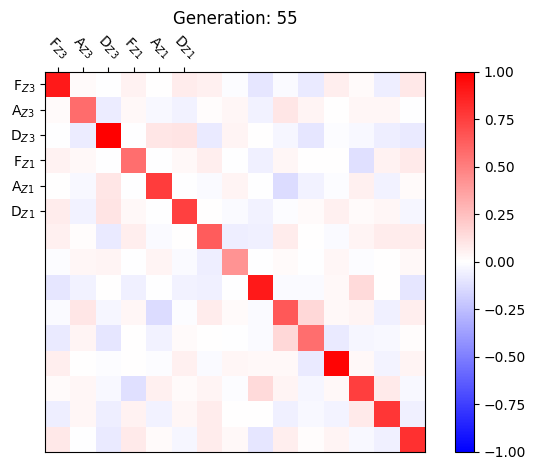

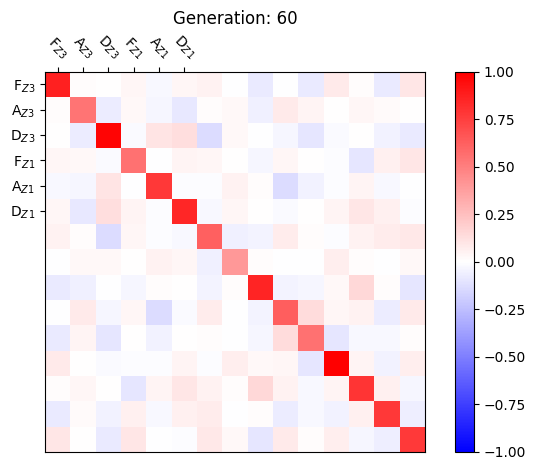

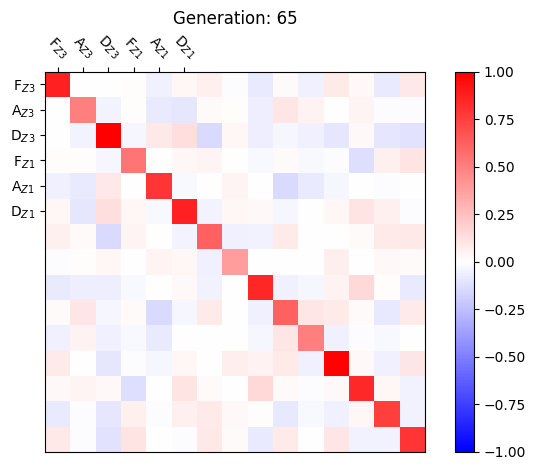

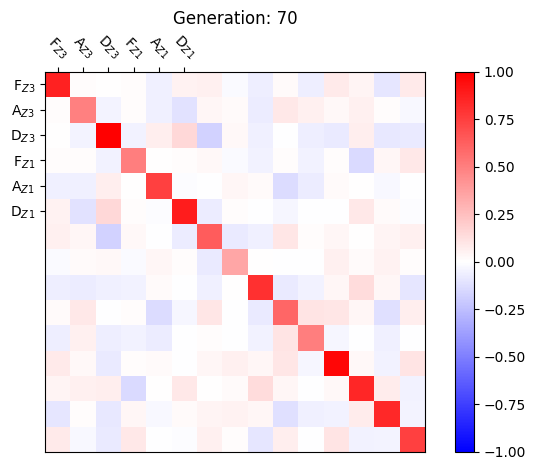

In [48]:
def plot_cov_matrix(cov_matrix, qubits, generation):
    # Create the plot
    fig, ax = plt.subplots()
    cax = ax.imshow(cov_matrix, cmap='bwr', vmin=-1, vmax=1)
    
    # Add colorbar
    fig.colorbar(cax)

    # Set ticks and labels
    base_labels = ['F', 'A', 'D']
    labels = [f"{label}$_{qubit[0]}$$_{qubit[1]}$" for qubit in qubits for label in base_labels]

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=-45)
    ax.set_yticklabels(labels, rotation=0)
    
    ax.xaxis.set_ticks_position('top')
    
    # # Add numerical annotations
    # for i in range(len(cov_matrix)):
    #     for j in range(len(cov_matrix[0])):
    #         ax.text(j, i, f"{cov_matrix[i, j]:.2f}", ha='center', va='center', color='black')
    
    # Titles and layout
    ax.set_title(f"Generation: {generation}")
    plt.tight_layout()
    plt.show()

    return None

qubits = ['Z3', 'Z1', 'X3']

sorted_keys = sorted(dataset.keys(), key=lambda k: int(k.split('_')[-1]))

for key in sorted_keys[::5]:
    qubits = ['Z3', 'Z1', 'X3']
    cov_matrix = dataset[key]
    cov_matrix = cov_matrix[:-3, :-3]
    
    qubits = qubits[:-1]
    plot_cov_matrix(cov_matrix, qubits, key.split('_')[-1])


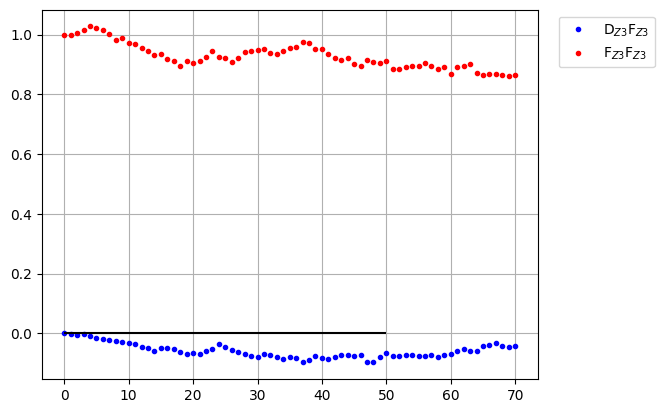

In [35]:
DZ1_DZ3 = []
DZ3_DZ3 = []

for key in sorted_keys:
    cov_matrix = dataset[key]
    cov_matrix = cov_matrix[:-3, :-3]
    DZ1_DZ3.append(cov_matrix[2,1])
    DZ3_DZ3.append(cov_matrix[0,0])
    
generation = range(len(sorted_keys))

plt.plot(generation, DZ1_DZ3, ".",  c = 'blue', label= r"D$_{Z3}$F$_{Z3}$")
plt.plot(generation, DZ3_DZ3, ".", c = "red", label= r"F$_{Z3}$F$_{Z3}$")
plt.legend(loc='upper right', bbox_to_anchor = (1.25,1.0))
plt.grid()
plt.hlines(0,0,50, color= "black")
plt.show()

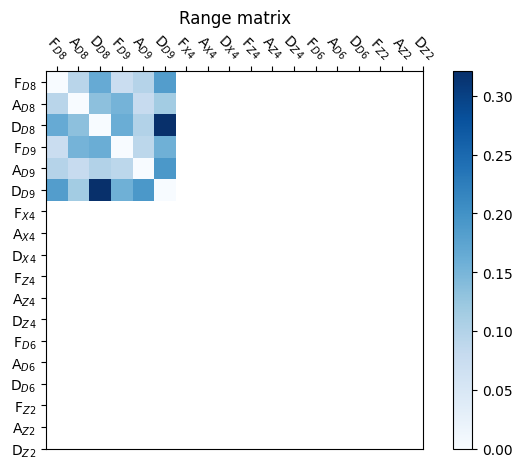

In [58]:
def plot_range_matrix(cov_matrix, qubits):
    # Create the plot
    fig, ax = plt.subplots()
    cax = ax.imshow(cov_matrix, cmap='Blues') #, vmin=-1, vmax=1)
    
    # Add colorbar
    fig.colorbar(cax)

    # Set ticks and labels
    base_labels = ['F', 'A', 'D']
    labels = [f"{label}$_{qubit[0]}$$_{qubit[1]}$" for qubit in qubits for label in base_labels]

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=-45)
    ax.set_yticklabels(labels)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=0)
    ax.xaxis.set_ticks_position('top')
    
    # # Add numerical annotations
    # for i in range(len(cov_matrix)):
    #     for j in range(len(cov_matrix[0])):
    #         ax.text(j, i, f"{cov_matrix[i, j]:.2f}", ha='center', va='center', color='black')
    
    # Titles and layout
    ax.set_title(f"Range matrix")
    plt.tight_layout()
    plt.show()

    return None
    
matrix_list = []
dataset = get_latest_cov(contains="CMAES")
sorted_keys = sorted(dataset.keys(), key=lambda k: int(k.split('_')[-1]))

for key in sorted_keys:
    cov_matrix = dataset[key]
    cov_matrix = cov_matrix[:-3, :-3]  

    # Set diagonal elements to zero
    cov_matrix = cov_matrix.copy()  # to avoid modifying original dataset
    np.fill_diagonal(cov_matrix, 0)

    matrix_list.append(cov_matrix)

# Stack into 3D array: shape = (num_generations, num_qubits, num_qubits)
stacked = np.stack(matrix_list)  # shape: (N, 2, 2) if 2 qubits

# # Compute variance over generations (axis=0)
# variance_matrix = np.var(stacked, axis=0)

range_matrix = np.max(stacked, axis=0) - np.min(stacked, axis=0)
# Plot the result
plot_range_matrix(range_matrix, qubits)

In [61]:
results = get_all_cov("20250522")
experiments = list(results.keys())

# Get sorted covariance matrix names from the first experiment
dataset = results[experiments[0]]
sorted_cov_matrices = sorted(dataset.keys(), key=lambda k: int(k.split('_')[-1]))

# Compute average matrix for each Cov_i across all files
average_cov_matrices = []

for cov_name in sorted_cov_matrices:
    matrices = []
    
    for exp in experiments:
        if cov_name in results[exp]:
            matrices.append(results[exp][cov_name])
    
    if matrices:  # avoid empty lists
        avg_matrix = np.mean(matrices, axis=0)
        average_cov_matrices.append(avg_matrix)

print(len(average_cov_matrices))

71


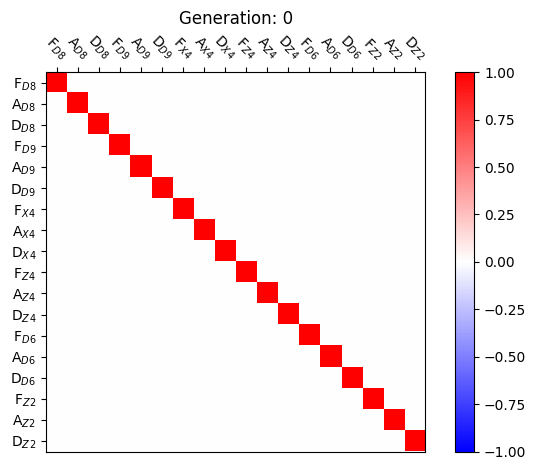

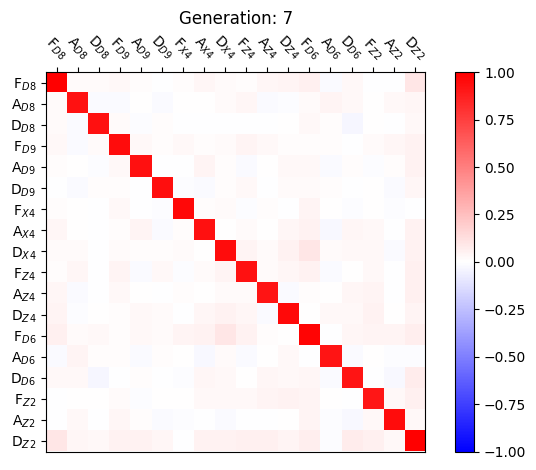

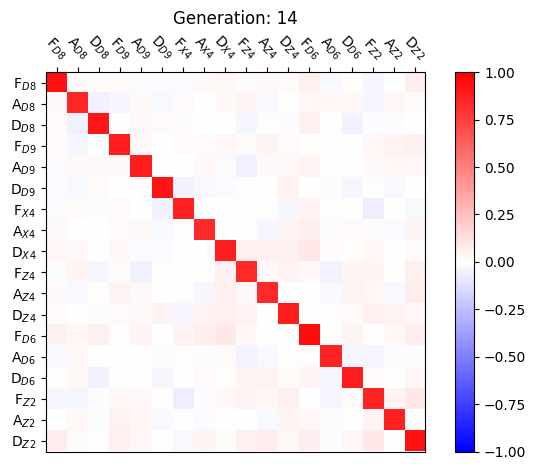

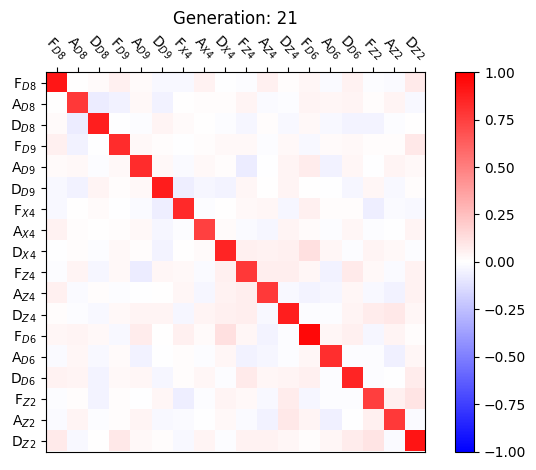

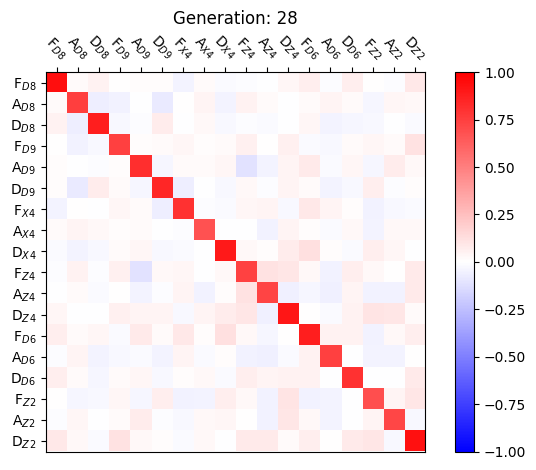

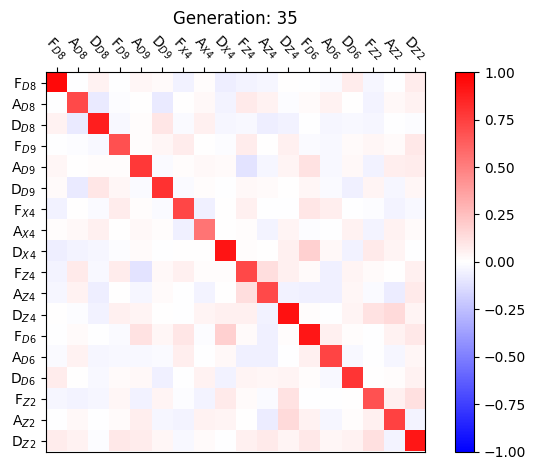

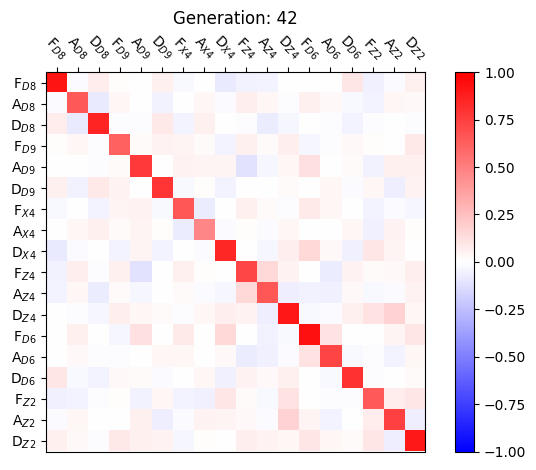

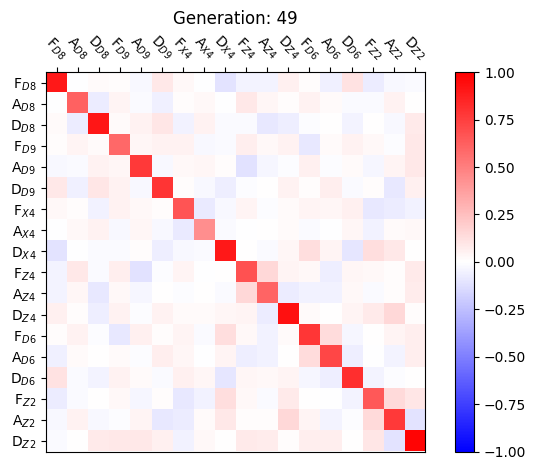

In [65]:
for key in sorted_keys[::7]:
    qubits = ['D8', 'D9', 'X4', 'Z4', 'D6', 'Z2']
    cov_matrix = dataset[key]
    cov_matrix = cov_matrix

    qubits = qubits
    plot_cov_matrix(cov_matrix, qubits, key.split('_')[-1])

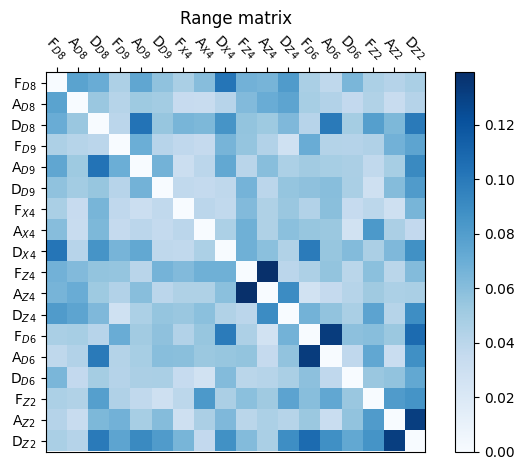

In [59]:
matrix_list = []

for cov_matrix in average_cov_matrices:
    # cov_matrix = dataset[key]
    # cov_matrix = cov_matrix[:-3, :-3]  

    # Set diagonal elements to zero
    cov_matrix = cov_matrix.copy()  # to avoid modifying original dataset
    np.fill_diagonal(cov_matrix, 0)

    matrix_list.append(cov_matrix)

# Stack into 3D array: shape = (num_generations, num_qubits, num_qubits)
stacked = np.stack(matrix_list)  # shape: (N, 2, 2) if 2 qubits

# # Compute variance over generations (axis=0)
# variance_matrix = np.var(stacked, axis=0)

range_matrix = np.max(stacked, axis=0) - np.min(stacked, axis=0)
# Plot the result
plot_range_matrix(range_matrix, qubits)